<a href="https://colab.research.google.com/github/Anne-Marie-Sim/AICT-Logical-Inference-model/blob/main/natmarie.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Predicting Hotel Guest Cancellations Using Machine Learning and Data and Analytics:**

# Project Overview:


This project focuses on developing a predictive model to estimate the likelihood of hotel booking cancellations using advanced data analytics and machine learning techniques. Cancellations pose a major challenge in the hospitality industry, often leading to inaccurate revenue forecasts, lower occupancy rates, and inefficient resource planning. These issues are particularly relevant in Singapore’s hospitality sector, where hotels must balance fluctuating tourist demand, limited room inventory, and operational constraints. By leveraging data-driven insights, this project aims to help hotels understand the key factors driving guest cancellations and translate these insights into actionable strategies to improve operational efficiency and profitability.

Developed entirely in Python, the project integrates essential data science libraries such as NumPy, Pandas, Matplotlib, Seaborn, and PyTorch to execute an end-to-end analytical workflow, from data preprocessing and exploratory data analysis (EDA) to feature engineering and predictive modeling. The dataset contains diverse booking attributes, including lead time, deposit type, customer type, and special requests, which collectively influence the likelihood of cancellation.

The process involves data cleaning, handling missing values, and removing noise, followed by training and evaluating multiple machine learning models to identify the most accurate predictor. The performance of each model is measured using suitable evaluation metrics to ensure robustness and interpretability. Additionally, feature importance analysis is conducted to identify the most influential factors affecting cancellations, offering valuable business insights for hotel managers and analysts.

Beyond predicting cancellations, the project demonstrates how data analytics and AI techniques can be applied to solve real-world challenges in the hospitality industry. The resulting framework can also serve as a template for other hotel datasets or related applications, enabling better demand forecasting, targeted customer retention strategies, and smarter operational planning across different markets and contexts.


# Methodology used:

# Business Relevance and Applications:

The predictive model developed in this project addresses a core operational challenge in the hospitality industry, which involve managing and forecasting guest cancellations. Hotel cancellations can lead to unpredictable room occupancy, inefficient staffing, and significant revenue losses. By enabling hotels to anticipate cancellations before they occur, this model empowers decision-makers to take proactive, data-informed actions that:

* Minimize revenue loss through optimized overbooking and room allocation strategies.
* Forecast cancellation risks in real time, allowing for better demand management and contingency planning.
* Enhance customer engagement by identifying and targeting guests with higher cancellation probabilities through personalized communication or loyalty incentives.

Although the initial dataset used in this project is international, the predictive framework is highly adaptable to Singapore’s hospitality landscape, where booking behavior is influenced by factors such as travel seasonality, public holidays, and the dynamic balance between business and leisure travel. Local hotels and resorts can retrain the model with domestic booking data to capture regional travel patterns and market dynamics, ensuring greater accuracy and relevance in predicting cancellations.

Beyond the hospitality sector, the analytical approach and model architecture demonstrated in this project serve as a scalable blueprint for predictive analytics across various industries, including:
* Airlines and travel agencies – to forecast booking cancellations and improve seat utilization.
* Service-based businesses – to predict customer churn and design retention strategies.
* Retail and logistics – to enhance inventory planning and demand forecasting.

Ultimately, this project illustrates how data analytics and artificial intelligence can transform operational challenges into strategic opportunities. It not only demonstrates technical competence in building predictive models but also reflects an understanding of how intelligent systems can drive efficiency, resilience, and customer-centric innovation in real-world business environments.6

###Imports:

In [2]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import pandas as pd
import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Part 1: Preperation and Exploration of data

Part 1.1: Loading and Reading the Data

In [4]:
# Replace 'your_file.csv' with the actual path to your CSV file in Google Drive
file_path = '/content/drive/My Drive/hotel_bookings.csv'
try:
    df = pd.read_csv(file_path)
    print("CSV file loaded successfully!")
    display(df.head())
except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found. Please check the path.")
except Exception as e:
    print(f"An error occurred: {e}")

CSV file loaded successfully!


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

| Index | Variable | Description |
|---|---|---|                                                                     
|
| 1     | hotel                          | Type of hotel (e.g., Resort Hotel or City Hotel)                                   |
| 2     | is_canceled                    | Indicates if the booking was canceled (1 = yes, 0 = no)                            |
| 3     | lead_time                      | Number of days between booking date and arrival date                               |
| 4     | arrival_date_year              | Year of arrival                                                                    |
| 5     | arrival_date_month             | Month of arrival                                                                   |
| 6     | arrival_date_week_number       | Week number of the year for arrival                                                |
| 7     | arrival_date_day_of_month      | Day of the month for arrival                                                       |
| 8     | stays_in_weekend_nights        | Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay   |
| 9     | stays_in_week_nights           | Number of weeknights (Monday to Friday) the guest stayed or booked to stay         |
| 10    | adults                         | Number of adults                                                                   |
| 11    | children                       | Number of children                                                                 |
| 12    | babies                         | Number of babies                                                                   |
| 13    | meal                           | Type of meal booked (e.g., BB = Bed & Breakfast, HB = Half Board, FB = Full Board) |
| 14    | country                        | Country of origin of the guest                                                     |
| 15    | market_segment                 | Market segment designation (e.g., Online, Corporate, Offline, Complementary)       |
| 16    | distribution_channel           | Booking distribution channel (e.g., Direct, TA/TO = Travel Agent/Tour Operator)    |
| 17    | is_repeated_guest              | Indicates if the guest is a repeated customer (1 = yes, 0 = no)                    |
| 18    | previous_cancellations         | Number of previous bookings that were canceled by the guest                        |
| 19    | previous_bookings_not_canceled | Number of previous bookings not canceled by the guest                              |
| 20    | reserved_room_type             | Code of room type reserved by the guest                                            |
| 21    | assigned_room_type             | Code of the room type assigned to the guest                                        |
| 22    | booking_changes                | Number of changes/amendments made to the booking                                   |
| 23    | deposit_type                   | Type of deposit made (No Deposit, Non Refund, Refundable)                          |
| 24    | agent                          | ID of the travel agency or booking agent                                           |
| 25    | company                        | ID of the company/entity that made the booking (if applicable)                     |
| 26    | days_in_waiting_list           | Number of days the booking was on the waiting list before confirmation             |
| 27    | customer_type                  | Type of customer (e.g., Contract, Group, Transient, Transient-Party)               |
| 28    | adr                            | Average Daily Rate (price per night)                                               |
| 29    | required_car_parking_spaces    | Number of car parking spaces required by the guest                                 |
| 30    | total_of_special_requests      | Total number of special requests made by the guest                                 |
| 31    | reservation_status             | Booking status at the time of data extraction (e.g., Canceled, Check-Out, No-Show) |
| 32    | reservation_status_date        | Date when the last status of the booking was updated                               |




Part 1.2: Cleaning the Data

In [6]:
### Removal of arrival_date_year column
#### Reason:
#### 1. The year itself usually does not add much predictive power unless your data spans multiple years with structural changes.
#### 2. Month and d9ay capture seasonal effects and are more predictive of cancellations.
if 'arrival_date_year' in df.columns:
    df = df.drop('arrival_date_year', axis=1)

### Removal of arrival_date_week column
#### Reason:
#### 1. Week number is just another way to represent the same timing as month/day.
#### 2. Month and day already capture seasonality and trends; including week number adds little extra value and may introduce multicollinearity.
if 'arrival_date_week_number' in df.columns:
    df = df.drop('arrival_date_week_number', axis=1)

### Removal of agent column
#### Reason:
#### 1. IDs rarely provide predictive power directly; the patterns are better captured by distribution channel or market segment.
if 'agent' in df.columns:
    df = df.drop('agent', axis=1)

### Removal of company column
#### Reason:
#### 1. Similar to Agent, this is mostly a company ID.
#### 2. High-cardinality IDs can overcomplicate the model without adding predictive value.
if 'company' in df.columns:
    df = df.drop('company', axis=1)

### Removal of reservation_status column
#### Reason:
#### 1. This column tells whether the booking was canceled, completed, or no-show, the target variable is_canceled already captures this information.
#### 2. Including it would leak the target into features, which is dangerous for ML.
if 'reservation_status' in df.columns:
    df = df.drop('reservation_status', axis=1)

### Removal of reservation_status_date column
#### Reason:
#### 1. This only indicates when the reservation status was updated.
#### 2. The date itself doesn’t add predictive power beyond what’s already encoded.
if 'reservation_status_date' in df.columns:
    df = df.drop('reservation_status_date', axis=1)

### Removal of country column
#### Reason:
#### 1. Not useful as we are unsure as there are no columns that indicate whether or not it's domestic or international
if 'country' in df.columns:
  df.drop('country', axis=1, inplace=True)



In [7]:
# numerical data
df_num = df.select_dtypes(['int64', 'float64']).copy()
df_num.head()
df_num.describe()


,is_canceled,lead_time,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000


In [8]:
# categorical data
df_cat = df.select_dtypes(['object']).copy()
df_cat.head()
df_cat.describe()

,hotel,arrival_date_month,meal,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type
count,119390,119390,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,8,5,10,12,3,4
top,City Hotel,August,BB,Online TA,TA/TO,A,A,No Deposit,Transient
freq,79330,13877,92310,56477,97870,85994,74053,104641,89613


In [9]:
df_cat.nunique()

,0
hotel,2
arrival_date_month,12
meal,5
market_segment,8
distribution_channel,5
reserved_room_type,10
assigned_room_type,12
deposit_type,3
customer_type,4


In [10]:
# Sum up the total number of missing values in each column
df.isna().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_month,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0
children,4
babies,0


In [11]:
# Handling null values
# Since there are only 4 null values in the children's column, we will remove them as we have a large dataset
df = df[df['children'].notna()]

df_num.head(100)
2

2

In [12]:
# Check only numerical columns for negative values
df_num = df.select_dtypes(['int64', 'float64']).copy()
negative_columns = df_num.columns[(df_num < 0).any()]
print("Columns with negative values:")
print(negative_columns)

Columns with negative values:
Index(['adr'], dtype='object')


A negative value in the ADR (Average Daily Rate) column is likely an **anomaly caused by data issues** rather than actual negative room rates. ADR is typically calculated as:

{ADR} = {Total Revenue}/{Number of Nights}

A negative ADR can occur if a booking was **canceled or refunded** and the refund was recorded in the revenue used for this calculation, or if there was a **data entry or calculation error** (e.g., total revenue recorded as negative or incorrect division). Such values usually indicate **exceptions, adjustments, or errors** in the dataset rather than real-world rates.


Correlation matrix for numeric columns:
                                is_canceled  lead_time  \
is_canceled                        1.000000   0.293177   
lead_time                          0.293177   1.000000   
arrival_date_day_of_month         -0.006084   0.002234   
stays_in_weekend_nights           -0.001783   0.085667   
stays_in_week_nights               0.024771   0.165799   
adults                             0.059990   0.119544   
children                           0.005048  -0.037622   
babies                            -0.032488  -0.020918   
is_repeated_guest                 -0.084788  -0.124418   
previous_cancellations             0.110140   0.086040   
previous_bookings_not_canceled    -0.057355  -0.073552   
booking_changes                   -0.144371   0.000138   
days_in_waiting_list               0.054193   0.170083   
adr                                0.047622  -0.063126   
required_car_parking_spaces       -0.195492  -0.116461   
total_of_special_requests       

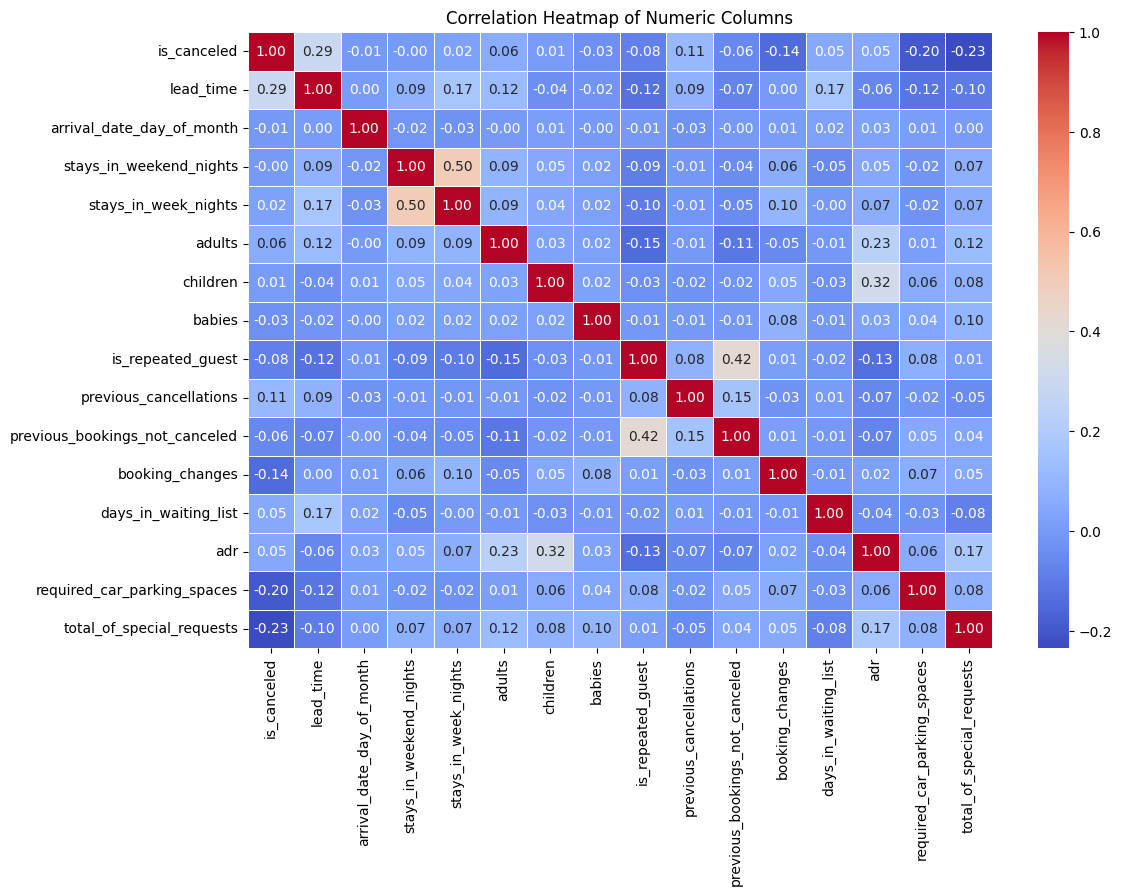

In [13]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Display correlation matrix
print("Correlation matrix for numeric columns:")
print(corr_matrix)

# Plot heatmap for better visualization
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numeric Columns")
plt.show()

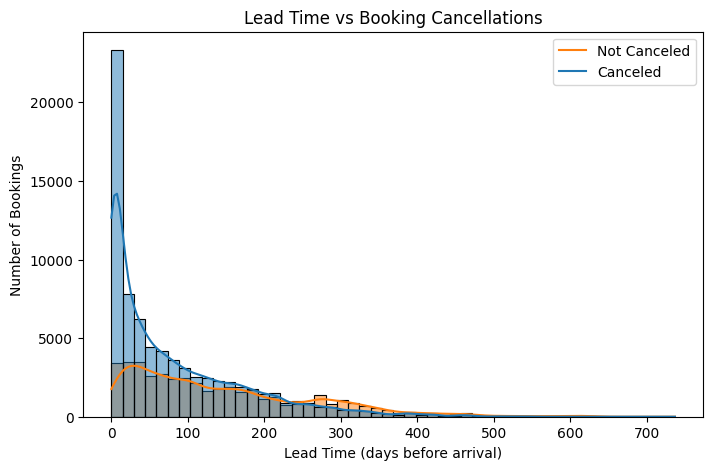

In [14]:
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='lead_time', hue='is_canceled', bins=50, kde=True)
plt.title('Lead Time vs Booking Cancellations')
plt.xlabel('Lead Time (days before arrival)')
plt.ylabel('Number of Bookings')
plt.legend(['Not Canceled', 'Canceled'])
plt.show()

Part 1.3: Exploratory Questions

